# Day 2 | Mathematical and logics operations on matrices

Today we will cover basic and advanced math operations in NumPy that includes sum, multiplication, vector operations, trigonometric functions etc...


### Vectorized operations on matrices

NumPy provides a convenient interface for many operation that require fast iterations or looping . This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Let have a look on the classic loop in Python and its speed:


In [3]:
import numpy as np  #lo importamos pero ahora mismo no lo estamos usando para este ejemplo

def simple_loop(values):            #los argumentos de la función es value
    output = np.empty(len(values))  #output = matriz empty del mismo tamaño que el array inicial
    for i in range(len(values)):    #hace un loop en el que empezando desde 0 hasta el tamaño de values divide por el número value
        output[i] = 1.0 / values[i]
    return output
    #cuanto mayor sea values, más tiempo va a tardar porque le hemos pedido que lo haga para el tamaño (len) de values.
    #len = length of values
    

x = np.linspace(1,10,10000) #x = array of ten values evenly spaced between 0 and 10
print(x)

%timeit simple_loop(x)  #le pedimos que haga la función simple_loop que hemos definido usando x como la variable values.

[ 1.          1.00090009  1.00180018 ...  9.99819982  9.99909991
 10.        ]
1.76 ms ± 83.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Si te fijas, tienes que hacer la función 10.000 veces porque esa es la longitud del array y en la función hemos dicho que para i en un rango de la longitud de values (que sería x en este caso), haya la operación 1/de entonces tiene que hacerlo 10.000 veces.

Now, we try vectorized operation on a big matrix. Hacemos lo mismo pero usando numpy directamente. Es decir, no haces la función haces directamente eso con TODA LA MATRIZ. No tienes que ir término por término.

In [3]:
%timeit (1.0 / x)

6.97 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


We are faster by nearly 3 orders of magnitude!@@@

### Exploring NumPy's Functions

NumPy functions exist in two flavors: *unary*, which operate on a single input, and *binary*, which operate on two inputs.
We'll see examples of both these types of functions are presented here:

In [7]:
x = np.linspace(1,10,10)
print("Do Nothing =", x)
print("Add =", x + 5)
print("Substract =", x - 5)
print("Multiply =", x * 2)
print("Divide =", x / 2)
print("Floor divide =", x // 2)  # floor division = para tener números redondeados tras la división

#si te fijas hace lo que le pides con cada uno de los términos del vector

Do Nothing = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Add = [ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
Substract = [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
Multiply = [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
Divide = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Floor divide = [0. 1. 1. 2. 2. 3. 3. 4. 4. 5.]


Other important math operations include:

In [5]:
print("negation     = ", -x)
print("power = ", x ** 2) #elevado a (^2)
print("modulus  = ", x % 2) #modulus te da el resto tras hacer la división entre 2. Num par % = 0

negation     =  [ -1.  -2.  -3.  -4.  -5.  -6.  -7.  -8.  -9. -10.]
power =  [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
modulus  =  [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|


We can combine operations and perform linear equation calculations as follows:


In [12]:
result = -(0.5*x + 1) ** np.sqrt(2)

In [13]:
result

array([ -1.77431468,  -2.66514414,  -3.65403041,  -4.72880439,
        -5.88069164,  -7.1029933 ,  -8.39038706,  -9.73851774,
       -11.14373963, -12.60294532])

**np.sqrt** quiere decir raiz cuadrada de 2. En este caso pones np.sqrt porque al parecer no hay un operador para esta función. Lo que hace es elevarlo a la raiz cuadrada de 2.

### Absolute values, exponents and logarithms

Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function:

In [15]:
x = np.linspace(-10,10,10)

x

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

In [16]:
abs(x) #te permite coger el número absoluto de todos los valores del vector. Te los transforma a positivo, vamos. 

array([10.        ,  7.77777778,  5.55555556,  3.33333333,  1.11111111,
        1.11111111,  3.33333333,  5.55555556,  7.77777778, 10.        ])

Another common type of operation available in a NumPy functions are the exponentials:

In [17]:
x = np.linspace(1,10,10)

print("x =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
e^x   = [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]
2^x   = [   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]
3^x   = [3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02 7.2900e+02
 2.1870e+03 6.5610e+03 1.9683e+04 5.9049e+04]


Similarly we can work with logarithms:

In [18]:

print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
ln(x)    = [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]
log2(x)  = [0.         1.         1.5849625  2.         2.32192809 2.5849625
 2.80735492 3.         3.169925   3.32192809]
log10(x) = [0.         0.30103    0.47712125 0.60205999 0.69897    0.77815125
 0.84509804 0.90308999 0.95424251 1.        ]


### Trigonometry

NumPy provides a large number of useful trigonometric functions that are very useful for the data scientist. Lets start by defining an array of angles:

In [24]:
angles = np.linspace(0, 2*np.pi, 10)

In [25]:
angles

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

Next, we compute trigonometric functions on those:
    

In [14]:
print("angles      = ", angles)
print("sin(angles) = ", np.sin(angles))
print("cos(angles) = ", np.cos(angles))
print("tan(angles) = ", np.tan(angles))

angles      =  [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
sin(angles) =  [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
cos(angles) =  [ 1.          0.76604444  0.17364818 -0.5        -0.93969262 -0.93969262
 -0.5         0.17364818  0.76604444  1.        ]
tan(angles) =  [ 0.00000000e+00  8.39099631e-01  5.67128182e+00 -1.73205081e+00
 -3.63970234e-01  3.63970234e-01  1.73205081e+00 -5.67128182e+00
 -8.39099631e-01 -2.44929360e-16]


Inverse trigonometric functions are easily applicable and can be nested:

In [15]:
np.arcsin(np.sin(angles))


array([ 0.00000000e+00,  6.98131701e-01,  1.39626340e+00,  1.04719755e+00,
        3.49065850e-01, -3.49065850e-01, -1.04719755e+00, -1.39626340e+00,
       -6.98131701e-01, -2.44929360e-16])

In [16]:
np.arccos(np.cos(angles))

array([0.       , 0.6981317, 1.3962634, 2.0943951, 2.7925268, 2.7925268,
       2.0943951, 1.3962634, 0.6981317, 0.       ])

### Advanced functions

NumPy has many more functions available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule scipy.special. If you want to compute some obscure mathematical function on your data, chances are it is implemented in *scipy.special*. 

In [ ]:
import scipy as sp

from scipy import special

# Gamma functions (generalized factorials) and related functions
x = np.linspace(1,10,10)
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

In [ ]:
# Error function (integral of Gaussian)
# its complement, and its inverse

print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

We can also generate sinusoid and analyze it using fast Fourier transformation (FFT):

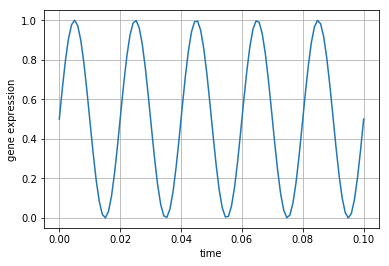

In [29]:
import matplotlib.pyplot as plotter

from scipy.fftpack import fft

# Number of sample points
N = 100
# sample spacing --> how often we take the measurements
T = 1.0 / 1000.0

#frequency, como de frecuentemente debe aparecer la máxima señal

F = 50

x = np.linspace(0.0, N*T, N)
y = 0.5*(1+np.sin(F * 2.0*np.pi*x)) #es una función sinoidal (sin), es una función periódica que se repite cada F

plotter.plot(x, y)
plotter.xlabel('time')
plotter.ylabel('gene expression')
plotter.axis('tight')
plotter.grid()
plotter.show()

#la amplitud es de 0-1 y el periodo es lo que va desde un máximo a otro máximo en el eje x. 

Now we perform fft and analyze the signal spectrum in frequency domain:
La transformada de fourier del tiempo es la frecuencia, recuerda!!!

Text(0, 0.5, 'power(signal)')

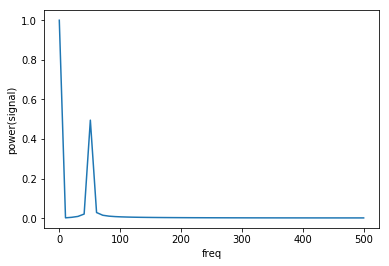

In [65]:
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2])) #en este caso estamos consiguiendo cómo de fuerte es la señal
plotter.xlabel('freq')
plotter.ylabel('power(signal)')

Nos está dando la frecuencia de la señal que es 50 que es lo que hemos pedido nosotros que fuera (T=50)

### Useful  Features

For binary functions, there are some interesting aggregates that can be computed directly from the object. For example, if we'd like to reduce an array with a particular operation, we can use the reduce method of any function. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, calling reduce on the add returns the sum of all elements in the array:

In [66]:
x = np.linspace(0, 1, 10)
x



array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

*reduce* quiere decir que lo haga en secuencia, es decir que coja los dos primeros y los sume y luego sume el siguiente y así sucesivamente. 

In [67]:
np.add.reduce(x)

5.0

Similarly we can **multiply all elements** in the vector:

In [30]:
x = np.linspace(1, 10, 10)
x


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [31]:
np.multiply.reduce(x)

3628800.0

Finally, any function can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplication table:

In [32]:
x = np.arange(1, 6)

x

array([1, 2, 3, 4, 5])

Multiplica todo por 1, luego todo por 2, luego todo por 3... así sucesivamente con los números del array, da lugar a:

In [33]:
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### Comparisons, Masks, and Boolean Logic

We will create Boolean masks to examine and manipulate values within NumPy matrices.
Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.


NumPy implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as functions.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

In [34]:
x = np.array([1, 2, 3, 4, 5])

In [35]:
x

array([1, 2, 3, 4, 5])

In [36]:
x < 3  # less than

array([ True,  True, False, False, False])

In [37]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [79]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [80]:
x >= 3 # greater or equal

array([False, False,  True,  True,  True])

In [81]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [82]:
x == 3  # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [83]:
(x ** 2) == (x * 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as functions in NumPy.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just as in the case of arithmetic operators, these will work on  multidimensional matrices.
Here is a two-dimensional example:

In [38]:

x = np.random.RandomState(0).randint(10, size=(3, 3))
x

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2]])

In [85]:
x > 0

array([[ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we have just created.

In [39]:
print(x)

[[5 0 3]
 [3 7 9]
 [3 5 2]]




To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [87]:
# how many values more than 5?
np.count_nonzero(x > 5)

2


Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``. Por ello lo que sea cierto para esa condición será tratado como 1 y por lo tanto sumara 1 tantas veces como sea cierta la condición y tendrás el número de elementos mayores que 5.

In [89]:
np.sum(x > 5)

2

In [40]:
# how many values less than 6 in each row?
np.sum(x > 5, axis=1)

array([0, 2, 0])

Cada número es el resultado para cada fila. Es decir, en la primera fila de x no hay ningún elemnto mayor que cinco y así sucesivamente. Restringimos la condición a una fila concreta.

In [41]:
x

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2]])



If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [92]:
np.any(x < 5)

True

In [94]:
# are all values equal to 6?
np.any(x == 6)

False

In [95]:
# are all values in each row less than 5?
np.all(x <= 5, axis=1)

array([ True, False,  True])

### Boolean operators



Python's *bitwise logic operators*, are ``&``, ``|``, ``^``, and ``~``.
Like with the standard arithmetic operators, NumPy overloads these as functions which work element-wise on (usually Boolean) matrices.

For example, we can address this sort of compound question as follows:

In [97]:
print(x)

np.sum((x > 1) & (x < 5) &  (x  !=  2))

[[5 0 3]
 [3 7 9]
 [3 5 2]]


3

Pones & para "sumar" elementos lógicos.

Alternatively:

In [98]:
np.sum(~( (x <= 1) | (x >= 5) ))

4

El | es **or** y el ~ es **negación** con lo cual es lo contrario a lo que hemos escrito. Por ello, por encima de 1 y debajo de 5.

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent functions:

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

A very powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.
Returning to our ``x`` array from before, suppose we want an array of all values in the matrix that are less than, say, 5:

In [99]:
x

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2]])

In [100]:
x < 5

array([[False,  True,  True],
       [ True, False, False],
       [ True, False,  True]])

Now to *select* these values from the array, we can simply index on this Boolean array; this is known as a *masking* operation:

In [101]:
x[x < 5]

array([0, 3, 3, 3, 2])

In [102]:
x[(x > 2) & (x < 5) & ]

array([3, 3, 3])

Si lo pones entre [] te da los elementos en un array y no solo te pone true o false

### Learning More
More information on universal functions (including the full list of available functions) can be found on the NumPy and SciPy documentation websites.
